In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd
from random import seed
from random import gauss

import seaborn as sns#Understanding my variables
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
train_data.shape

(891, 12)

In [4]:
test_data.shape

(418, 11)

In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

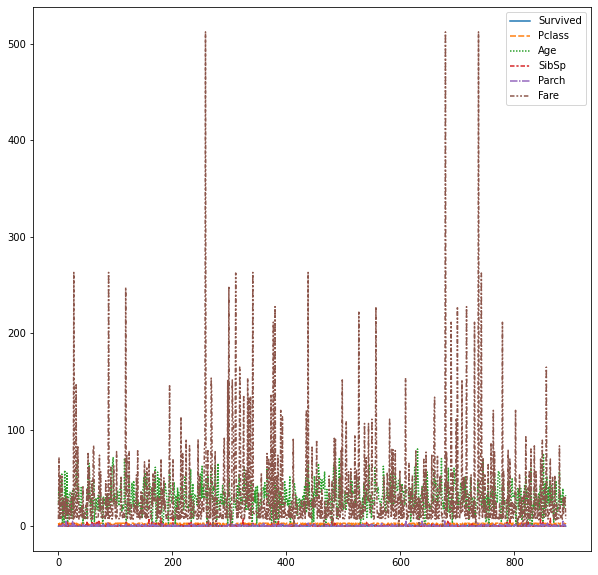

In [9]:
graphshow_traindata = train_data.drop(['PassengerId'], axis=1)
plt.figure(figsize=(10,10))
sns.lineplot(data=graphshow_traindata)

In [10]:
test_data.isnull().values.sum()

414

In [11]:
train_data.isnull().values.sum()

866

In [12]:
 test_data.columns[test_data.isna().any()].tolist()

['Age', 'Fare', 'Cabin']

In [13]:
 train_data.columns[train_data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [14]:
test_data.nunique(axis=0)

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [15]:
train_data.nunique(axis=0)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


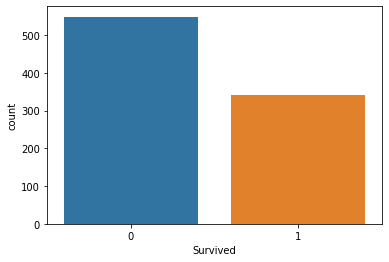

In [16]:
sns.countplot('Survived',data=train_data)
plt.show()

In [17]:
train_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cohen, Mr. Gurshon ""Gus""",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [19]:
test_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"West, Miss. Barbara J",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


<AxesSubplot:>

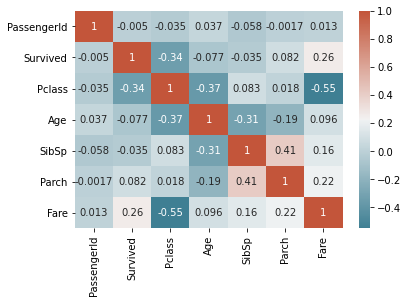

In [21]:
corr = train_data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

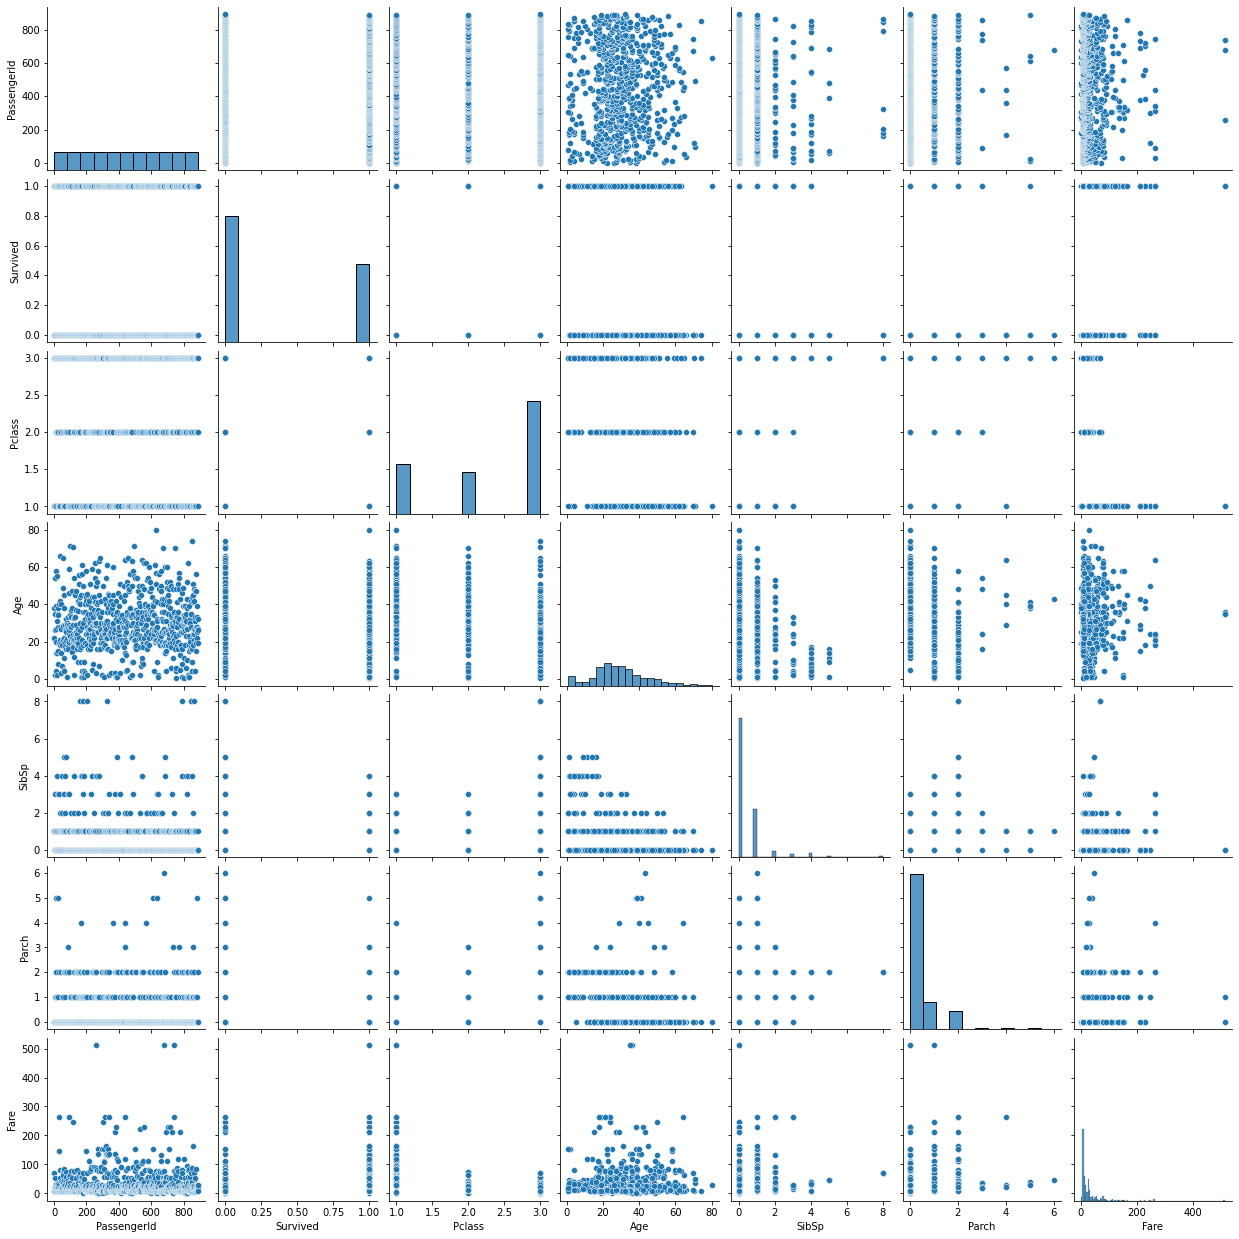

In [22]:
sns.pairplot(train_data)

<AxesSubplot:ylabel='Frequency'>

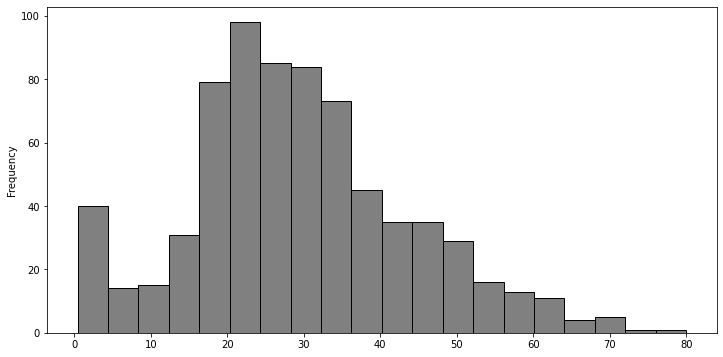

In [23]:
train_data['Age'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

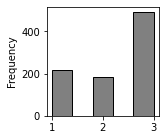

In [24]:
train_data['Pclass'].plot(kind='hist', bins=5, figsize=(2,2), facecolor='grey',edgecolor='black') 

<AxesSubplot:ylabel='Frequency'>

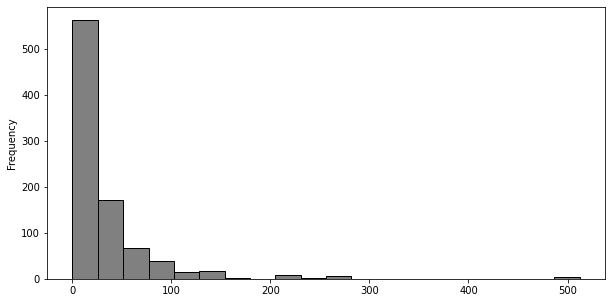

In [25]:
train_data['Fare'].plot(kind='hist', bins=20, figsize=(10,5), facecolor='grey',edgecolor='black')

In [26]:
firstclass = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_firstclass = sum(firstclass)/len(firstclass)



secondclass = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_secondclass = sum(secondclass)/len(secondclass)



thirdclass = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_thirdclass = sum(thirdclass)/len(thirdclass)

print("% of First class who survived:", rate_firstclass)
print("% of Second class who survived:", rate_secondclass)
print("% of First class who survived:", rate_thirdclass)

% of First class who survived: 0.6296296296296297
% of Second class who survived: 0.47282608695652173
% of First class who survived: 0.24236252545824846


In [27]:
pd.crosstab([train_data.Pclass],train_data.Survived,margins=True).style.background_gradient('Greens')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [28]:
embarkedq = train_data.loc[train_data.Embarked == "Q"]["Survived"]
rate_embarkedq = sum(embarkedq)/len(embarkedq)

embarkeds = train_data.loc[train_data.Embarked == "S"]["Survived"]
rate_embarkeds = sum(embarkeds)/len(embarkeds)

embarkedc = train_data.loc[train_data.Embarked == "C"]["Survived"]
rate_embarkedc = sum(embarkedc)/len(embarkedc)

print("% of Queenstown passengers who survived:", rate_embarkedq)
print("% of Cherbourg passengers who survived:", rate_embarkeds)
print("% of Southampton passengers who survived:", rate_embarkedc)

% of Queenstown passengers who survived: 0.38961038961038963
% of Cherbourg passengers who survived: 0.33695652173913043
% of Southampton passengers who survived: 0.5535714285714286


In [29]:
pd.crosstab([train_data.Embarked],train_data.Survived,margins=True).style.background_gradient('Greens')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [30]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)


men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [31]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='Greens')

In [32]:
 train_data.columns[train_data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

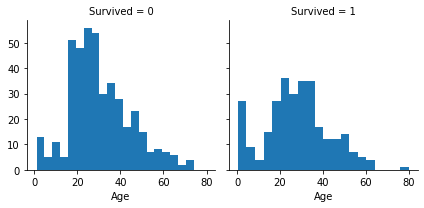

In [33]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='Age'>

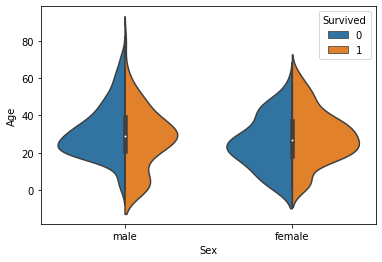

In [34]:
sns.violinplot("Sex","Age", hue="Survived", data=train_data,split=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

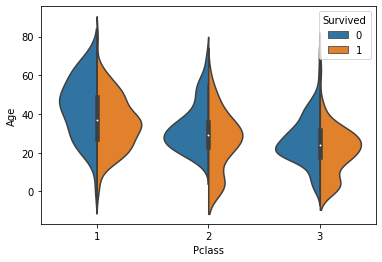

In [35]:
sns.violinplot("Pclass","Age", hue="Survived", data=train_data,split=True)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


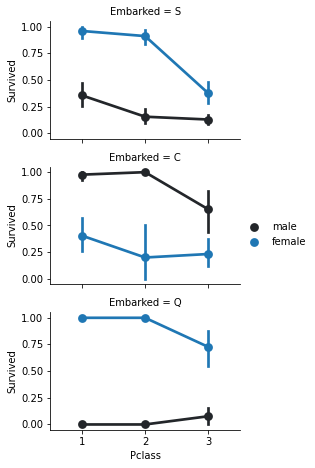

In [36]:
grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

In [37]:
age_guess = train_data["Age"].mean()
train_data["Age"].fillna(age_guess, inplace = True)
test_data["Age"].fillna(age_guess, inplace = True)
train_data.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [38]:
mostCommonPort = train_data.Embarked.dropna().mode()[0]
train_data["Embarked"].fillna(mostCommonPort, inplace = True)
test_data["Embarked"].fillna(mostCommonPort, inplace = True)

In [39]:
train_data = train_data.drop(['Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)

In [40]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "Embarked", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

X.shape, y.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [41]:
rdm_Forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rdm_Forest.fit(X, y)
predictionsForest = rdm_Forest.predict(X_test)

In [42]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
predictionsDecisionTree = decision_tree.predict(X_test)

In [43]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictionsDecisionTree})
output.to_csv('my_submission_DecisionTree.csv', index=False)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictionsForest})
output.to_csv('my_submission_Forest.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
